

### **What is a Feature in an Image?**
A **feature** in an image is any piece of information that helps in identifying or distinguishing objects.  
**Example:**  
- A **corner** in an image is where two edges meet.  
- A **keypoint** is a distinctive part of an image that remains identifiable under different lighting or transformations.

**Question:** What is the difference between an edge and a keypoint?  
**Answer:** An **edge** is a boundary where pixel intensity changes sharply, while a **keypoint** is a distinctive point that can be used for matching in different images.



## **Features of an Image**
| Feature Type | Examples | Use Case |
|-------------|---------|----------|
| **Color** | RGB, HSV, Histogram | Image Classification |
| **Edges** | Canny, Sobel, Prewitt | Object Boundaries |
| **Texture** | Gabor, LBP, GLCM | Texture Analysis |
| **Keypoints** | SIFT, SURF, ORB | Image Matching |
| **Shape** | Contours, Hough Transform | Object Detection |
| **Blobs** | LoG, DoG, FAST | Region of Interest |
| **Object-Level** | YOLO, Faster R-CNN | Object Recognition |
| **Deep Learning** | CNNs, Autoencoders | Feature Extraction |

---


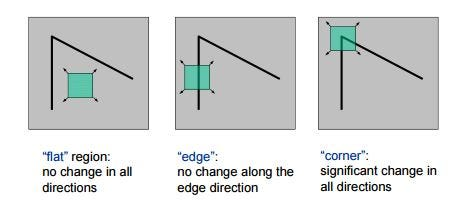

In [ ]:
# prompt: import and display image

from IPython.display import Image
Image('/content/0_PPJxP5y_k4GCWLBM.jpg') # Replace with the actual path to your image in Google Drive



### **🔹 What is a Corner? (Harris Corner Detector)**
A **corner** is a point where **gradient changes in multiple directions**.  
A popular method to detect corners is the **Harris Corner Detector**.


#### **Python Code for Harris Corner Detector:**


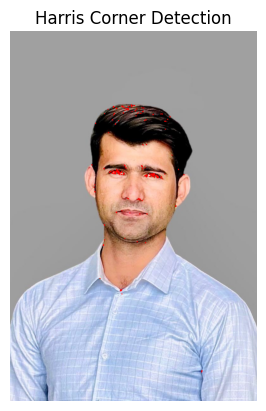

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/content/myimage.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detector
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate to mark the corners clearly
harris_corners = cv2.dilate(harris_corners, None)


# Highlight corners in red
image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Convert BGR to RGB for Matplotlib display
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with corners
plt.imshow(image)
plt.title("Harris Corner Detection")
plt.axis("off")  # Hide axis for better visualization
plt.show()



## **Comparison of Corner Detection Methods**  
| **Method** | **Speed** | **Accuracy** | **Best Use Case** |
|------------|-----------|--------------|------------------|
| Harris | Medium | Medium | General corner detection |
| Shi-Tomasi | Medium | High | Feature tracking |
| FAST | High | Low | Real-time applications |

---


## **Introduction to Keypoints**  
- **Definition**: Keypoints (also called interest points or feature points) are distinctive and repeatable points in an image that are useful for various tasks like object recognition, tracking, and 3D reconstruction.  
- **Importance**: Keypoints help in **matching images, detecting objects, and creating feature descriptors** for image analysis.  
- **Real-world Applications**:  
  - **Face Recognition**: Detecting facial landmarks.  
  - **Object Detection**: Identifying objects across different images.  
  - **Medical Imaging**: Detecting key features in X-rays, MRIs, etc.  
  - **Autonomous Vehicles**: Detecting lane markings, pedestrians, etc.  

---

## **Types of Keypoints in an Image**  
Keypoints are classified based on the **algorithm used to detect them**.

### **🔹 2.1 Edge-Based Keypoints**  
- **Detects edges where pixel intensity changes sharply.**  
- **Example Methods**:  
  - **Canny Edge Detector**: Finds edges by detecting intensity gradients.  
  - **Sobel Operator**: Computes the gradient in X and Y directions.  

**Example: Detecting Edges with Canny**  


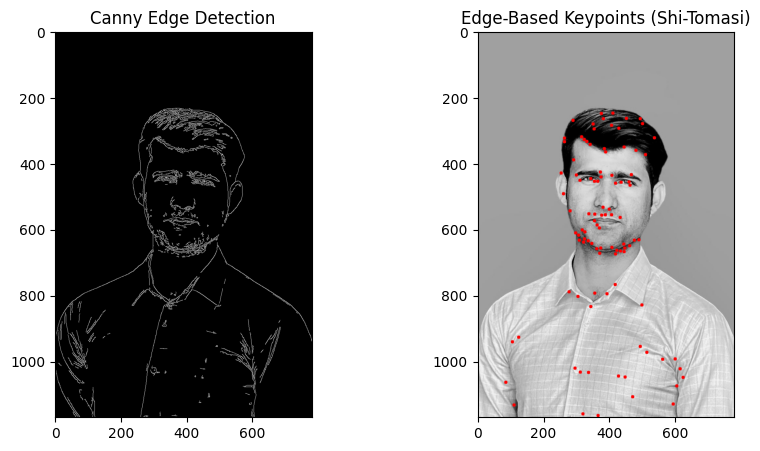

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread("/content/myimage.jpeg", cv2.IMREAD_GRAYSCALE)

# Step 1: Detect edges using Canny Edge Detector
edges = cv2.Canny(image, 100, 200)

# Step 2: Find keypoints (corners) along edges using Shi-Tomasi Detector
corners = cv2.goodFeaturesToTrack(edges, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Convert image to color for visualization
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Step 3: Draw keypoints on the image
if corners is not None:
    for corner in corners:
        x, y = int(corner[0][0]), int(corner[0][1])
        cv2.circle(image_color, (x, y), 5, (0, 0, 255), -1)  # Red keypoints

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title("Edge-Based Keypoints (Shi-Tomasi)")

plt.show()


- Canny Edge Detector finds sharp edges in the image.
- Shi-Tomasi Corner Detector selects keypoints along the detected edges.
- The keypoints are marked in red on the image


### **🔹 2.2 Corner-Based Keypoints (Interest Points)**  
- **Detects corners where two edges meet** (useful for tracking and object matching).  
- **Example Methods**:  
  - **Harris Corner Detector**: Identifies corners based on intensity variations.  
  - **Shi-Tomasi Corner Detector**: Improves Harris by selecting the best corners.  

**Example: Harris Corner Detection**  


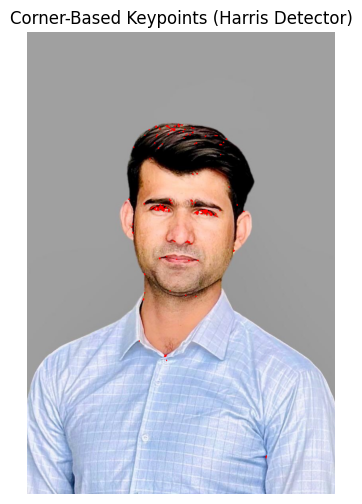

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread("/content/myimage.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Apply Harris Corner Detector
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Step 2: Dilate to mark corners more clearly
harris_corners = cv2.dilate(harris_corners, None)

# Step 3: Threshold for an optimal value to mark the corners
image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # Mark corners in red

# Show results
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Corner-Based Keypoints (Harris Detector)")
plt.axis("off")
plt.show()



### **2.3 Feature-Based Keypoints (Scale & Rotation-Invariant)**  
- **Detects keypoints that remain stable under transformations (scaling, rotation, lighting changes).**  
- **Example Methods**:  
  - **SIFT (Scale-Invariant Feature Transform)**  
  - **SURF (Speeded-Up Robust Features) [Faster than SIFT]**  
  - **ORB (Oriented FAST and Rotated BRIEF) [Efficient alternative to SIFT/SURF]**  

**Example: Detecting SIFT Keypoints**  


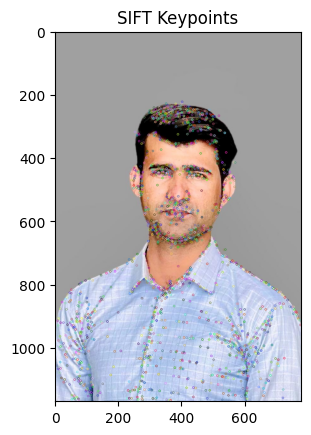

In [ ]:

import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/content/myimage.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints")
plt.show()




## **3 Keypoint Matching & Descriptor Computation**  
Once keypoints are detected, they are **matched** across images for various applications.

### **3.1 Feature Descriptors**  
Feature descriptors encode keypoint information into numerical vectors.  
- **SIFT/SURF Descriptors**: Describe texture around keypoints.  
- **BRIEF & ORB**: Binary descriptors (faster, used in real-time applications).  

Example:

- A corner is a keypoint, but to recognize it in a different image (with scale/rotation changes), we need a descriptor that captures its local intensity pattern.

**Example: ORB Keypoint Detection & Matching**  



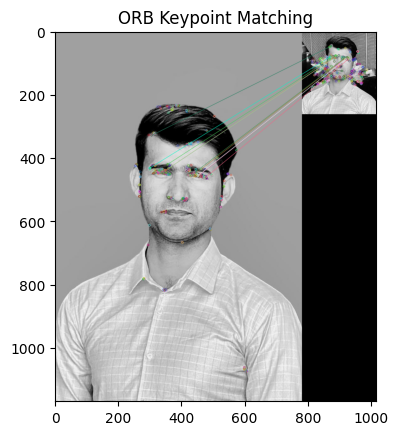

In [ ]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread("/content/myimage.jpeg", 0)
image2 = cv2.imread("/content/pic2.jpeg", 0)

orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None)

plt.imshow(image_matches)
plt.title("ORB Keypoint Matching")
plt.show()




### **What Are Descriptors in Keypoint Detection?**  
**Descriptors** are numerical representations of keypoints.  
- They describe the **local appearance** around a keypoint to make it recognizable and comparable across images.  
- Descriptors help in **feature matching, object recognition, and tracking**.  

---

### **Keypoint vs. Descriptor**
| **Term**      | **Definition** |
|--------------|--------------|
| **Keypoint**  | A distinctive point in an image (e.g., corner, edge, blob). |
| **Descriptor** | A numerical vector that describes the appearance around a keypoint. |

🔹 **Example:**  
- A **corner** is a **keypoint**, but to recognize it in a different image (with scale/rotation changes), we need a **descriptor** that captures its **local intensity pattern**.

---

### **Types of Descriptors**
There are different types of descriptors used in computer vision:

#### **1️⃣ SIFT (Scale-Invariant Feature Transform) Descriptor**
- Computes a **128-dimensional vector** for each keypoint.
- Uses **gradient magnitude and orientation** in a local patch.
- **Scale- and rotation-invariant**, making it useful for matching across different images.

#### **2️⃣ ORB (Oriented FAST and Rotated BRIEF) Descriptor**
- Uses **binary strings** instead of floating-point vectors (faster computation).
- More efficient than SIFT while still being rotation-invariant.

#### **3️⃣ BRIEF (Binary Robust Independent Elementary Features)**
- A **simpler and faster descriptor** that compares pixel intensities.
- Not scale- or rotation-invariant.

#### **4️⃣ SURF (Speeded Up Robust Features) Descriptor**
- Similar to SIFT but faster, using **Haar wavelets** instead of pixel gradients.



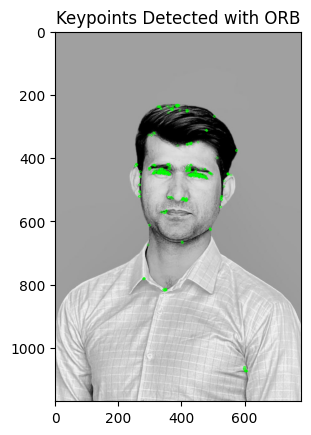

Descriptor shape: (500, 32)


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/myimage.jpeg', 0)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw keypoints on image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

# Display results
plt.imshow(image_with_keypoints, cmap='gray')
plt.title("Keypoints Detected with ORB")
plt.show()

# Print descriptor shape
print(f"Descriptor shape: {descriptors.shape}")  # Example: (500, 32) - 500 keypoints, each 32-dimensional

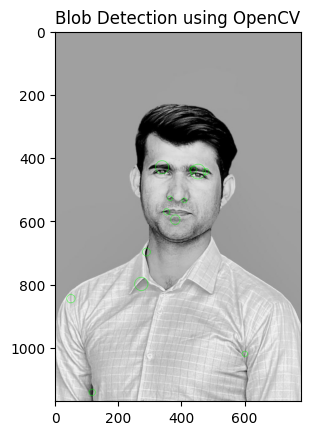